<h1 style="font-size:30; text-align:center">RELATION ENTRE VARIABLES QUANTITATIVES</h1><h6 style="text-align:center">Par Mamadou NDIAYE</h6>

In [1]:
# Code optionnel

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Importation des données 'nhanes_2015-2016.csv'

df = pd.read_csv('nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

Les sonnées de certaines variables comme la situation matrimoniale (variable DMDMARTL) et le genre (RIAGENDR) ne sont pas au bon format. La variable indiquant la situation matrimoniale est en réalité une variable catégorielle et non une variable quantitative. Nous allons réetiuer ces deux variables en considérant leur description.

In [6]:
# Situation matrimoniale

df["DMDMARTL"] = df.DMDMARTL.replace(
    {1.0: "Married", 2.0: "Widowed",
    3.0: "Divorced", 4.0: "Separated",
    5.0: "never married", 60.: "Living with partner",
    77.0: "Refused", 99.0: "Don't know", np.nan: 'Missing'})

# Genre

df['RIAGENDR'] = df['RIAGENDR'].replace({1: 'Male', 2:'Female'})
   
# Réétiquetage de la vairable 'DMDEDUC2'
   
df["DMDEDUC2"] = df.DMDEDUC2.replace(
    {1: "<9", 2: "9-11", 3: "HS/GED",
    4: "Some college/AA", 5: "College",
    7: "Refused", 9: "Don't know", np.nan: 'Missing'})

In [7]:
df.isna().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2       0
DMDMARTL       0
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

In [8]:
# Remplacement des valeurs manquantes par la moyenne

df.fillna(df.mean(), inplace = True)

# Verfification

df.isna().sum()

SEQN        0
ALQ101      0
ALQ110      0
ALQ130      0
SMQ020      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
WTINT2YR    0
SDMVPSU     0
SDMVSTRA    0
INDFMPIR    0
BPXSY1      0
BPXDI1      0
BPXSY2      0
BPXDI2      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
HIQ210      0
dtype: int64

<h1 style="font-size:20; color:red">Nuage de points et Coefficient de corrélation de Pearson</h1>

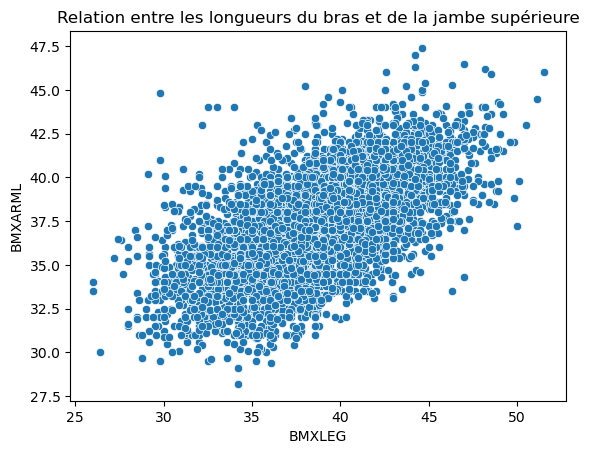

In [11]:
# Relation entre la variable 'BMXARML' et la variable 'BMXLEG'

sns.scatterplot(x = 'BMXLEG', y = 'BMXARML', data = df)

plt.title("Relation entre les longueurs du bras et de la jambe supérieure")
plt.show()          

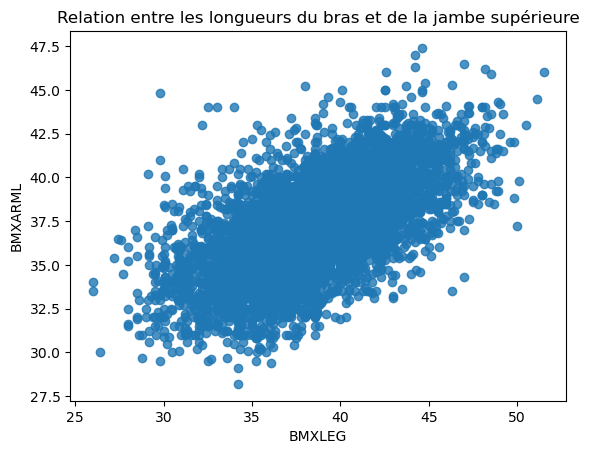

In [12]:
# Nuage de points entre les variables 'BMXARML' et  'BMXLEG'

sns.regplot(x = 'BMXLEG', y = 'BMXARML', fit_reg = False, data = df)

plt.title("Relation entre les longueurs du bras et de la jambe supérieure")
plt.show()  

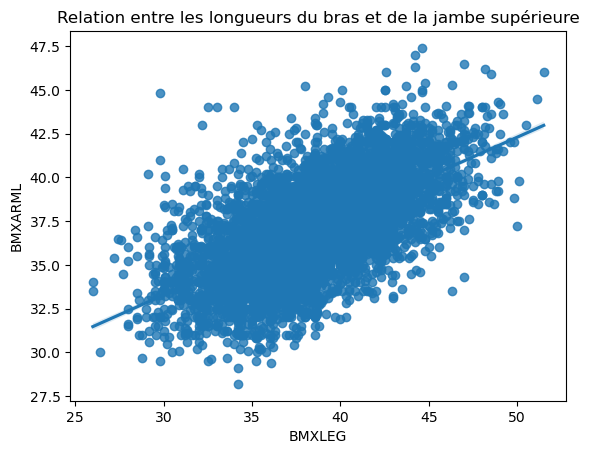

In [13]:
# Régression linéaires simple entre les variables 'BMXARML' et  'BMXLEG'

sns.regplot(x = 'BMXLEG', y = 'BMXARML', fit_reg = True, data = df)

plt.title("Relation entre les longueurs du bras et de la jambe supérieure")
plt.show()

In [15]:
# Coefficient de Pearson entre les variables 'BMXARML' et  'BMXLEG'

stats.pearsonr(df['BMXARML'], df['BMXLEG'])

PearsonRResult(statistic=0.6189135459893216, pvalue=0.0)

In [16]:
df.corr()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIDAGEYR,RIDRETH1,DMDCITZN,DMDHHSIZ,WTINT2YR,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
SEQN,1.000000,-0.006243,-0.001199,0.016129,0.017550,0.001928,0.012015,-0.008717,-0.024727,0.000342,...,0.001021,0.008104,0.009019,0.005283,0.008511,0.012605,0.016361,0.011238,0.000096,-0.007437
ALQ101,-0.006243,1.000000,-0.013033,0.027407,0.215476,0.042113,0.023412,0.079538,0.084429,-0.151487,...,0.010470,-0.058372,-0.097240,-0.260076,0.022606,-0.207747,-0.187107,-0.056968,-0.017780,0.032077
ALQ110,-0.001199,-0.013033,1.000000,-0.023016,0.124127,-0.018147,-0.011008,0.049701,0.035961,-0.027646,...,-0.007421,-0.039930,-0.049105,-0.042809,-0.035779,-0.014118,-0.043280,-0.047377,-0.050183,0.021419
ALQ130,0.016129,0.027407,-0.023016,1.000000,-0.009888,0.002269,0.011711,0.009397,-0.009157,-0.023223,...,-0.014891,-0.001134,0.002234,0.017788,-0.006234,0.027734,0.022111,0.009070,-0.003094,0.004172
SMQ020,0.017550,0.215476,0.124127,-0.009888,1.000000,-0.139940,0.006692,0.075460,0.105990,-0.049887,...,-0.085408,-0.016781,-0.091496,-0.163927,-0.021589,-0.074952,-0.158009,-0.055373,-0.096296,0.014689
RIDAGEYR,0.001928,0.042113,-0.018147,0.002269,-0.139940,1.000000,-0.042209,-0.118094,-0.363930,-0.047806,...,0.435696,-0.052712,-0.010295,-0.143641,0.059100,-0.295919,0.022205,-0.039862,0.213379,0.074520
RIDRETH1,0.012015,0.023412,-0.011008,0.011711,0.006692,-0.042209,1.000000,-0.153300,-0.113354,0.015321,...,-0.000561,0.085353,-0.065064,0.148664,-0.154918,0.199941,0.072997,-0.085727,-0.145164,0.024898
DMDCITZN,-0.008717,0.079538,0.049701,0.009397,0.075460,-0.118094,-0.153300,1.000000,0.179094,-0.166294,...,-0.064584,-0.003307,-0.133232,-0.143693,-0.077376,-0.110959,-0.141509,-0.080207,-0.102249,-0.024595
DMDHHSIZ,-0.024727,0.084429,0.035961,-0.009157,0.105990,-0.363930,-0.113354,0.179094,1.000000,-0.145241,...,-0.156529,0.027527,-0.007203,-0.060750,0.018992,0.010372,-0.086381,0.037355,-0.056577,-0.013677
WTINT2YR,0.000342,-0.151487,-0.027646,-0.023223,-0.049887,-0.047806,0.015321,-0.166294,-0.145241,1.000000,...,-0.084639,0.055217,0.087274,0.205125,-0.005565,0.122310,0.121833,0.029149,0.031821,0.022048


<AxesSubplot: >

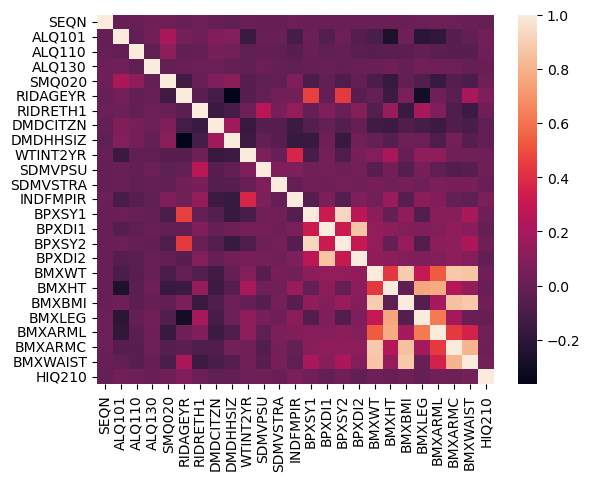

In [17]:
# Carte des corrélations

sns.heatmap(df.corr())

In [26]:
# Carte des corrélations améliorée

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBU', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title("Carte de corrélation de Pearson")
plt.show()

KeyError: "'RdBU' is not a known colormap name"

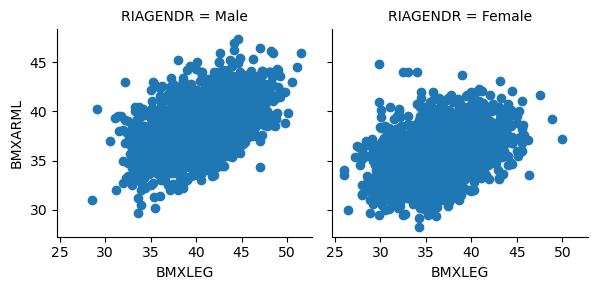

In [27]:
# Relation entre la variable 'BMXARML' et la variable 'BMXLEG' selon le genre

sns.FacetGrid(df, col='RIAGENDR').map(plt.scatter, 'BMXLEG', 'BMXARML').add_legend();

In [32]:
# Coefficient de Pearson entre les variables 'BMXARML' et  'BMXLEG' selon le genre

stats.pearsonr(df[df.RIAGENDR == 'Female']['BMXARML'],
               df[df.RIAGENDR == 'Female']['BMXLEG'])

PearsonRResult(statistic=0.4417207678131512, pvalue=2.2075048806571946e-142)

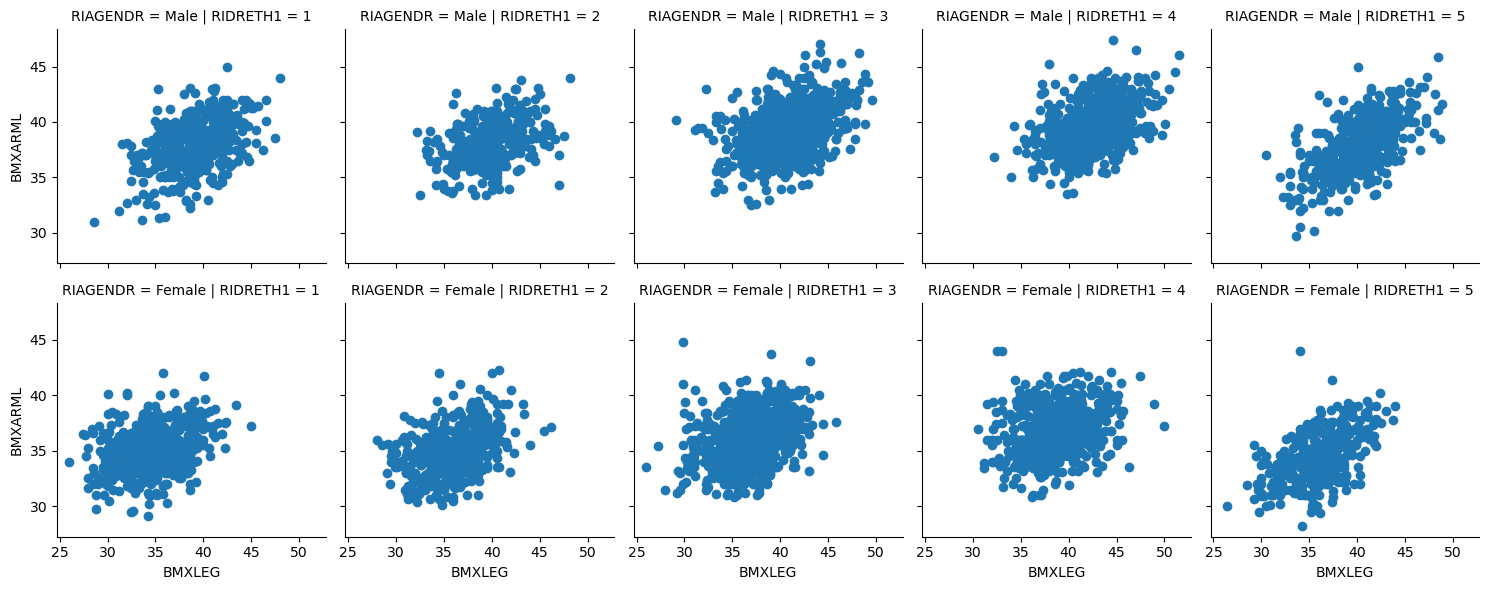

In [33]:
# Relation entre la variable 'BMXARML' et la variable 'BMXLEG' par sexe et par ethnie

sns.FacetGrid(df, col = 'RIDRETH1', row = 'RIAGENDR').map(plt.scatter, 'BMXLEG', 'BMXARML').add_legend()